# Procuring and Reading Geospatial Data

In [ ]:
# Installing cdsapi on colab
!pip install cdsapi

In [ ]:
# Using the url and key given cds api website
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 72169:cb5db4ab-b253-4bd5-bd78-80646055adfe'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 72169:cb5db4ab-b253-4bd5-bd78-80646055adfe


In [ ]:
# Creating a directory named 'Data' to store the downloaded datasets
import os
os.mkdir("/content//Data")

In [ ]:
# Downloading 'Temperature of air at 2m above the surface' dataset Temperature.nc
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': '2m_temperature',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'Data//Temperature.nc')

2021-01-08 13:19:27,392 INFO Welcome to the CDS
2021-01-08 13:19:27,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-01-08 13:19:27,679 INFO Request is completed
2021-01-08 13:19:27,680 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data5/adaptor.mars.internal-1609854535.179495-883-28-8de9b248-d55a-4697-933a-db826f9d3ed8.nc to Data//Temperature.nc (37.1M)
2021-01-08 13:19:31,217 INFO Download rate 10.5M/s


Result(content_length=38924276,content_type=application/x-netcdf,location=https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data5/adaptor.mars.internal-1609854535.179495-883-28-8de9b248-d55a-4697-933a-db826f9d3ed8.nc)

In [ ]:
# Downloading 'Total precipitation' dataset as Precipitation.nc
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'total_precipitation',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'Data//Precipitation.nc')

2021-01-08 13:19:35,445 INFO Welcome to the CDS
2021-01-08 13:19:35,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-01-08 13:19:35,722 INFO Request is completed
2021-01-08 13:19:35,724 INFO Downloading https://download-0008.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1609823184.844999-17453-3-fd685d97-5322-41f5-8b12-6d34e093afc7.nc to Data//Precipitation.nc (37.1M)
2021-01-08 13:19:40,006 INFO Download rate 8.7M/s


Result(content_length=38924280,content_type=application/x-netcdf,location=https://download-0008.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1609823184.844999-17453-3-fd685d97-5322-41f5-8b12-6d34e093afc7.nc)

In [ ]:
# Downloading 'Volumetric soil water layer 1' dataset as Soil.nc

import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'Data//Soil.nc')

2021-01-08 13:19:46,093 INFO Welcome to the CDS
2021-01-08 13:19:46,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-01-08 13:19:46,300 INFO Request is completed
2021-01-08 13:19:46,301 INFO Downloading https://download-0008.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1609940013.2134724-24742-3-33b1c743-b13b-4ef1-a669-61fd4feef07e.nc to Data//Soil.nc (37.1M)
2021-01-08 13:19:52,047 INFO Download rate 6.5M/s


Result(content_length=38924304,content_type=application/x-netcdf,location=https://download-0008.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1609940013.2134724-24742-3-33b1c743-b13b-4ef1-a669-61fd4feef07e.nc)

In [ ]:
# Importing required libraries
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Opening Temperature.nc datset and converting it to a dataframe
temp = xr.open_dataset('/content/Data/Temperature.nc')
temp_data = temp.to_dataframe()

In [ ]:
# Viewing temp
temp

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan ... 241.98854
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 13:48:57 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Opening Precipitation.nc datset and converting it to a dataframe

ppt = xr.open_dataset('/content/Data/Precipitation.nc')
ppt_data = ppt.to_dataframe()

In [ ]:
ppt

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 nan nan ... 3.4734607e-05
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 05:06:26 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Opening Soil.nc datset and converting it to a dataframe

soil = xr.open_dataset('/content/Data/Soil.nc')
soil_data = soil.to_dataframe()

In [ ]:
soil

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 nan nan ... 0.2060981
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-06 13:33:35 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

For all the above 3 datasets:- Longitude Resolution: 0.1, Latitude Resolution: 0.1, Spatial Resolution: 1801x3600


# Exploring and Visualising Geospatial Data

In [ ]:
temp

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan ... 241.98854
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 13:48:57 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
temp_data

t2m
latitude longitude  time                           
 90.0    0.000000   2019-12-01 12:00:00         NaN
                    2019-12-02 12:00:00         NaN
                    2019-12-03 12:00:00         NaN
         0.100000   2019-12-01 12:00:00         NaN
                    2019-12-02 12:00:00         NaN
...                                             ...
-90.0    359.799988 2019-12-02 12:00:00  242.344086
                    2019-12-03 12:00:00  241.988541
         359.899994 2019-12-01 12:00:00  241.684784
                    2019-12-02 12:00:00  242.344086
                    2019-12-03 12:00:00  241.988541

[19450800 rows x 1 columns]

In [ ]:
# Finding unique time values
np.unique(temp.time)

array(['2019-12-01T12:00:00.000000000', '2019-12-02T12:00:00.000000000',
       '2019-12-03T12:00:00.000000000'], dtype='datetime64[ns]')

From the above we can see that the time period is from '2019-12-01' to '2019-12-03' at 12:00:00

In [ ]:
# Calculating the number of unique values in time, latitutde and longitude
len(np.unique(temp.time).tolist()), len(np.unique(temp.latitude).tolist()),len(np.unique(temp.longitude).tolist())

(3, 1801, 3600)

In [ ]:
# Last 5 values of temp
temp_data.tail()

t2m
latitude longitude  time                           
-90.0    359.799988 2019-12-02 12:00:00  242.344086
                    2019-12-03 12:00:00  241.988541
         359.899994 2019-12-01 12:00:00  241.684784
                    2019-12-02 12:00:00  242.344086
                    2019-12-03 12:00:00  241.988541

In [ ]:
temp_data.shape

(19450800, 1)

##### Basic Statistics

(array([  66015.,  747567., 1060419.,  963604., 1094208.,  618429.,
         338605.,  650124.,  952062.,  147556.]),
 array([223.88467, 233.0581 , 242.23155, 251.40498, 260.57843, 269.75186,
        278.9253 , 288.09872, 297.2722 , 306.44562, 315.61905],
       dtype=float32),
 <a list of 10 Patch objects>)

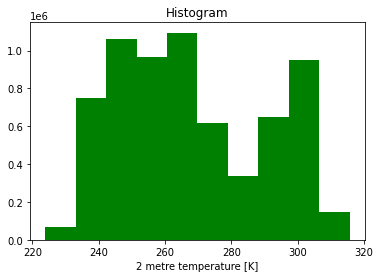

In [ ]:
# Visualising 't2m' in temp by histogram
temp.t2m.plot(color ='g')

In [ ]:
temp_data.describe()
# As we can see, the mean of the tem dataset is 2.668467e+02 and median is 2.638579e+02

,t2m
count,6.638589e+06
mean,2.668467e+02
std,2.182645e+01
min,2.238847e+02
25%,2.489008e+02
50%,2.638579e+02
75%,2.903467e+02
max,3.156190e+02


The range of temperature data is from 223.88 K to 315.6 K

We can use Pearson's median skewness coefficient to evaluate the dataset's skewness. It is given by as: g = 3(mean-median)/standard deviation. From the dataset we get the mean = 268.19617, median = 263.9 and standard deviation=21.89 So, using the above formula, we get g = 0.58. As, g is very less, it indicates that the dataset has ver little positive skewness.

In [ ]:
# Last 5 values in Total precipitation dataset
ppt_data.head()

tp
latitude longitude time                   
90.0     0.0       2019-12-01 12:00:00 NaN
                   2019-12-02 12:00:00 NaN
                   2019-12-03 12:00:00 NaN
         0.1       2019-12-01 12:00:00 NaN
                   2019-12-02 12:00:00 NaN

(array([6.598597e+06, 3.529100e+04, 3.179000e+03, 8.400000e+02,
        3.480000e+02, 1.250000e+02, 7.000000e+01, 6.700000e+01,
        4.200000e+01, 3.000000e+01]),
 array([1.0430813e-07, 1.6209938e-02, 3.2419771e-02, 4.8629604e-02,
        6.4839438e-02, 8.1049271e-02, 9.7259104e-02, 1.1346894e-01,
        1.2967877e-01, 1.4588860e-01, 1.6209844e-01], dtype=float32),
 <a list of 10 Patch objects>)

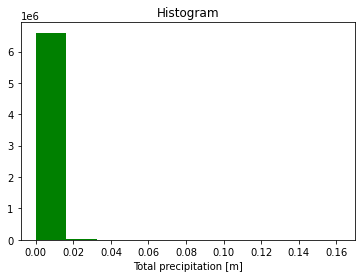

In [ ]:
ppt.tp.plot(color ='g')

In [ ]:
ppt_data.describe()
 

,tp
count,6.638589e+06
mean,7.224642e-04
std,2.683861e-03
min,1.043081e-07
25%,1.043081e-07
50%,1.247227e-05
75%,2.474561e-04
max,1.620984e-01


The range of Total precipitation data is 0.000000104 m to 0.162 m.

g = 3(mean-median)/standard deviation. From the dataset we get the mean = 0.00071753, median = 1.247e-05 and standard deviation= 0.00267 So, using the above formula, we get g = 0.82. 

In [ ]:
soil_data.head()

swvl1
latitude longitude time                      
90.0     0.0       2019-12-01 12:00:00    NaN
                   2019-12-02 12:00:00    NaN
                   2019-12-03 12:00:00    NaN
         0.1       2019-12-01 12:00:00    NaN
                   2019-12-02 12:00:00    NaN

g = 3(mean-median)/standard deviation. From the dataset we get the mean =0.2642821, median =0.2698 and standard deviation= 0.1283 So, using the above formula, we get g = -0.127 which implies very less negative skewness.

(array([7.618080e+05, 3.947050e+05, 1.443442e+06, 1.245480e+06,
        1.632284e+06, 8.459540e+05, 1.893090e+05, 6.150700e+04,
        6.254400e+04, 1.556000e+03]),
 array([0.        , 0.07660065, 0.1532013 , 0.22980194, 0.3064026 ,
        0.38300323, 0.45960388, 0.5362045 , 0.6128052 , 0.6894058 ,
        0.76600647], dtype=float32),
 <a list of 10 Patch objects>)

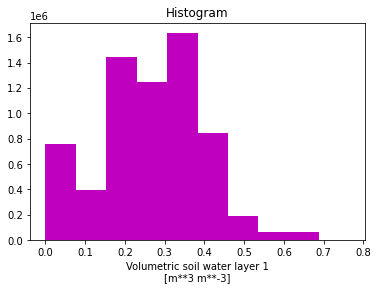

In [ ]:
# Visualising
soil.swvl1.plot(color ='m')

In [ ]:
soil_data.describe()

,swvl1
count,6.638589e+06
mean,2.640720e-01
std,1.301196e-01
min,0.000000e+00
25%,1.920130e-01
50%,2.697557e-01
75%,3.537285e-01
max,7.660065e-01


The range of the Volumetric soil water layer 1 is 0 m3 m-3 to 0.766 m3 m-3.

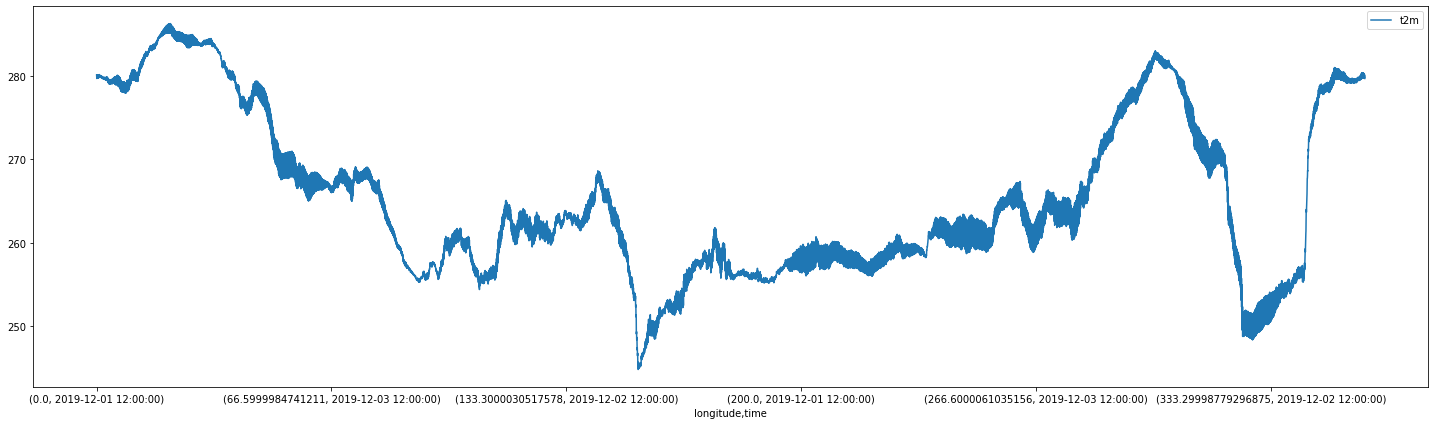

In [ ]:
temp.mean("latitude").to_dataframe().plot(figsize = (25, 7))

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


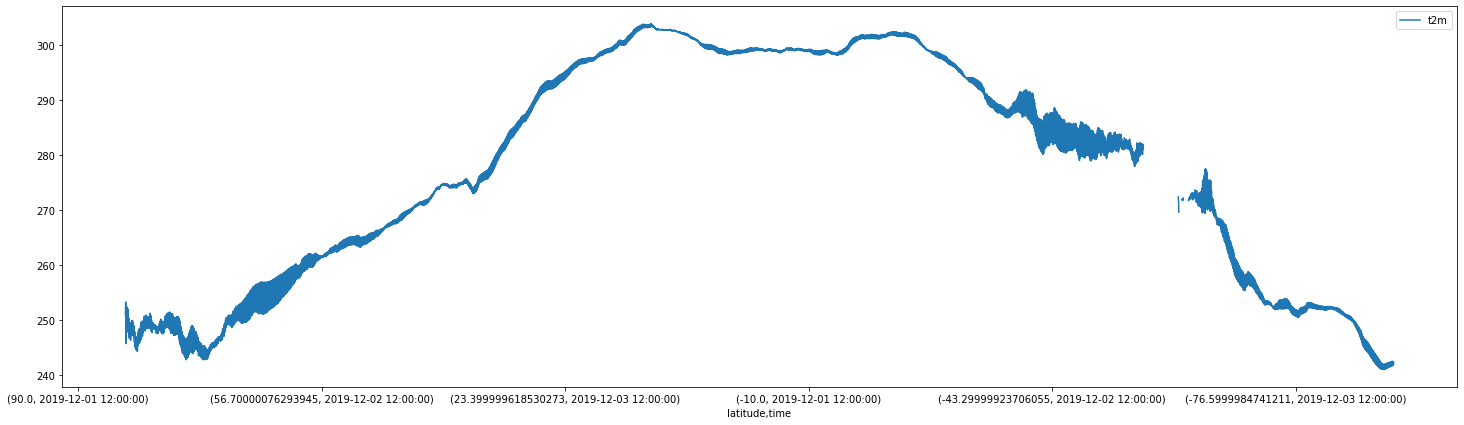

In [ ]:
temp.mean("longitude").to_dataframe().plot(figsize = (25, 7))

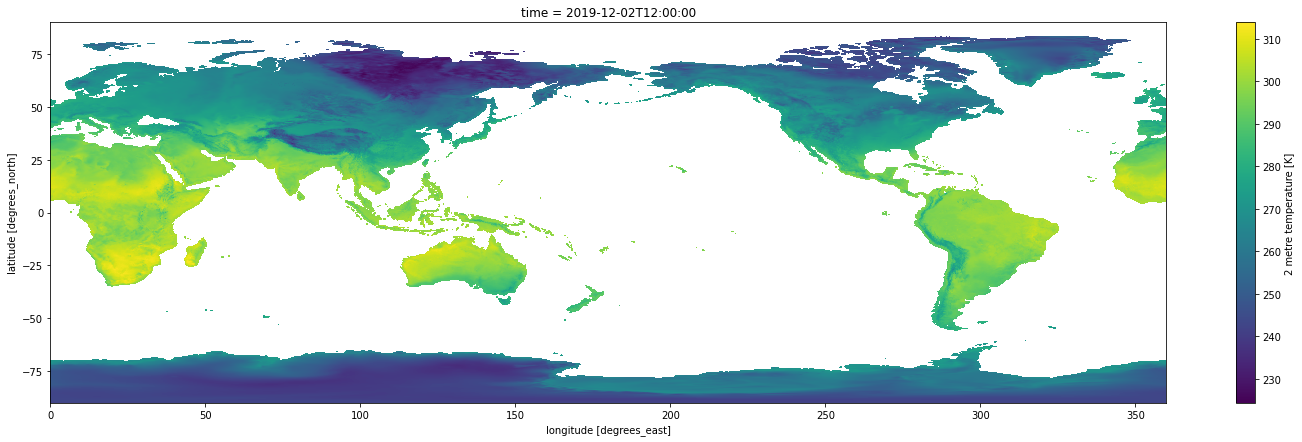

In [ ]:
# Plotting sequential colormap on day = 2019-12-02 for temp
temp.t2m.isel(time=1).plot(figsize = (25, 7))

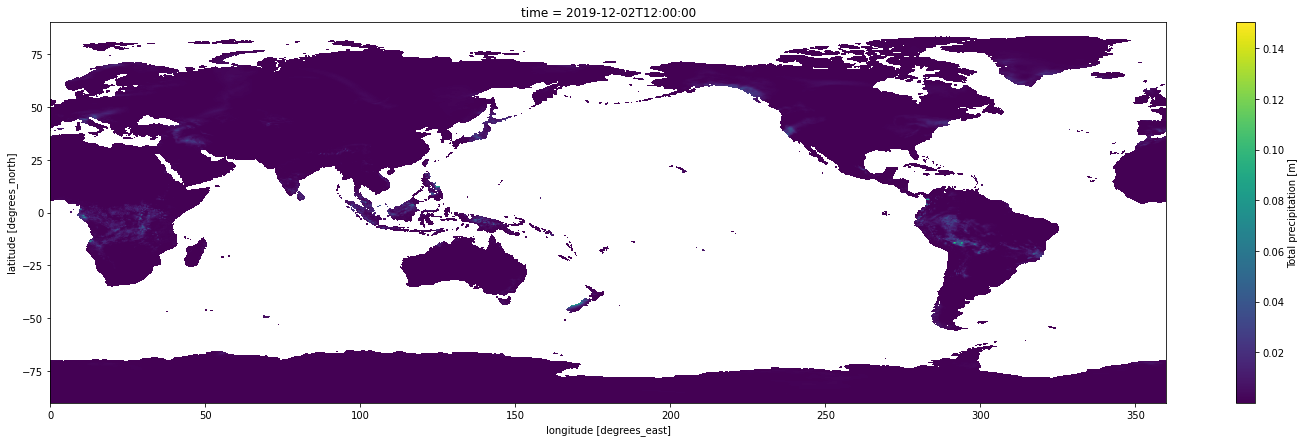

In [ ]:
# Plotting sequential colormap on day = 2019-12-02 for ppt
ppt.tp.isel(time=1).plot(figsize = (25, 7))

We observe the majority of the region recieve total precipation below 0.02m.

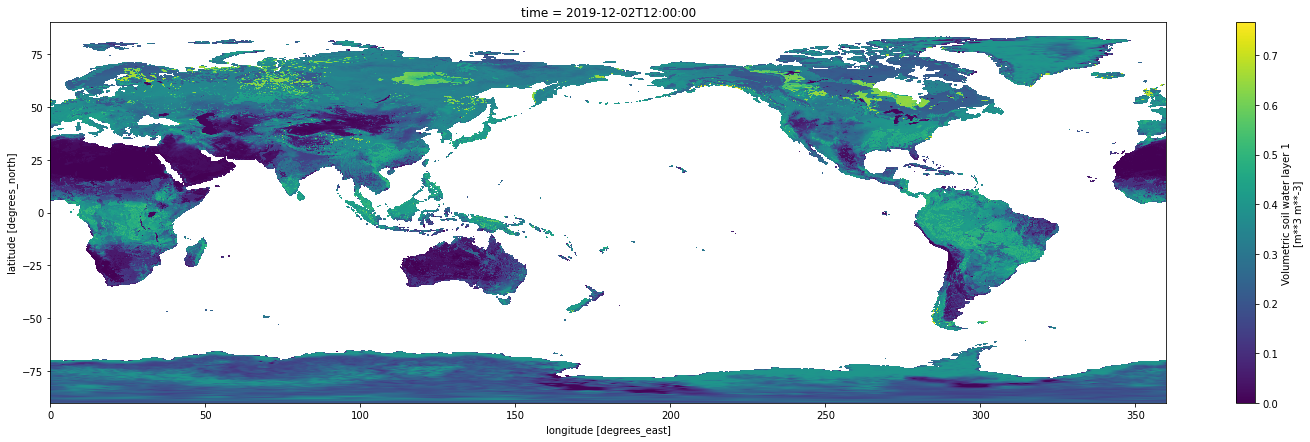

In [ ]:
# Plotting sequential colormap on day = 2019-12-02 for soil
soil.swvl1.isel(time=1).plot(figsize = (25, 7))

Majority of the region have 0.3-0.4 m**3 m**-3 volumetric soil water layer1

##### Handling null values

In [ ]:
temp_data.shape, ppt_data.shape, soil_data.shape

((19450800, 1), (19450800, 1), (19450800, 1))

In [ ]:
# Checking if null values are present in all three datasets
temp_data.isnull().sum(), ppt_data.isnull().sum(), soil_data.isnull().sum()

(t2m    12812211
 dtype: int64, tp    12812211
 dtype: int64, swvl1    12812211
 dtype: int64)

In [ ]:
# # Replacing the nan values of temp by mean
# temp = temp.fillna(temp_data.t2m.mean())
# temp_data = temp_data.fillna(temp_data.t2m.mean())

# # Replacing the nan values by median . I didn't choose 'mean' as it is a skewded dataset.
# ppt = ppt.fillna(ppt_data.tp.median())
# ppt_data = ppt_data.fillna(ppt_data.tp.median())

# # Replacing nan values in soil data by mean. It is a less skewed dataset.
# soil = soil.fillna(soil_data.swvl1.mean())
# soil_data = soil_data.fillna(soil_data.swvl1.mean())






In the above code cell, I tried to replace NaN values of the temperature data by it's mean; precipitation data by it's median and volumetric soil layer data by it's mean. But unfortunately, it led to issues while training the neural network model. While performing training of model, our aim is to predict 'Total Precipitation' by using 'Temperature of air at 2m above the surface and 'Volumetric soil water layer 1'. So, if we are replacing NaN values in the precipatation data by it's median, we are indirectly predicting the target variable on our own which should not be the case. So, I chose to drop the NaN values. I have dropped the NaN values of all variables in the 'Deep Learning for Geospatial Data' section. This is because we get a lot more NaN values after interpolation.

# Preprocessing Geospatial Data

##### Interpolation

In [ ]:
# Code for Interpolating
new = 0.08
new_longitude = np.arange(0, 360, new)
new_latitude = np.arange(90, -90-new, -new)


In [ ]:
# Interpolating temp dataset
temp_interp = temp.interp(longitude=new_longitude,latitude=new_latitude)

In [ ]:
temp_interp

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 4500, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
  * longitude  (longitude) float64 0.0 0.08 0.16 0.24 ... 359.8 359.8 359.9
  * latitude   (latitude) float64 90.0 89.92 89.84 89.76 ... -89.84 -89.92 -90.0
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan ... 242.0 nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 13:48:57 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Converting interpolated temp data to dataframe
temp_interp_data = temp_interp.to_dataframe()
temp_interp_data

t2m
latitude longitude time                           
 90.0    0.00      2019-12-01 12:00:00         NaN
                   2019-12-02 12:00:00         NaN
                   2019-12-03 12:00:00         NaN
         0.08      2019-12-01 12:00:00         NaN
                   2019-12-02 12:00:00         NaN
...                                            ...
-90.0    359.84    2019-12-02 12:00:00  242.344086
                   2019-12-03 12:00:00  241.988541
         359.92    2019-12-01 12:00:00         NaN
                   2019-12-02 12:00:00         NaN
                   2019-12-03 12:00:00         NaN

[30388500 rows x 1 columns]

In [ ]:
# Interpolating precipitation dataset
ppt_interp = ppt.interp(longitude=new_longitude,latitude=new_latitude)
ppt_interp

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 4500, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
  * longitude  (longitude) float64 0.0 0.08 0.16 0.24 ... 359.8 359.8 359.9
  * latitude   (latitude) float64 90.0 89.92 89.84 89.76 ... -89.84 -89.92 -90.0
Data variables:
    tp         (time, latitude, longitude) float64 nan nan nan ... 3.473e-05 nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 05:06:26 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Converting interpolated ppt data to dataframe
ppt_interp_data = ppt_interp.to_dataframe()
ppt_interp_data

tp
latitude longitude time                         
 90.0    0.00      2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
                   2019-12-03 12:00:00       NaN
         0.08      2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
...                                          ...
-90.0    359.84    2019-12-02 12:00:00  0.000089
                   2019-12-03 12:00:00  0.000035
         359.92    2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
                   2019-12-03 12:00:00       NaN

[30388500 rows x 1 columns]

In [ ]:
# Interpolating soil dataset
soil_interp = soil.interp(longitude=new_longitude,latitude=new_latitude)
soil_interp

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 4500, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
  * longitude  (longitude) float64 0.0 0.08 0.16 0.24 ... 359.8 359.8 359.9
  * latitude   (latitude) float64 90.0 89.92 89.84 89.76 ... -89.84 -89.92 -90.0
Data variables:
    swvl1      (time, latitude, longitude) float64 nan nan nan ... 0.2061 nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-06 13:33:35 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Converting soil data to dataframe
soil_interp_data = soil_interp.to_dataframe()
soil_interp_data

swvl1
latitude longitude time                         
 90.0    0.00      2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
                   2019-12-03 12:00:00       NaN
         0.08      2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
...                                          ...
-90.0    359.84    2019-12-02 12:00:00  0.206098
                   2019-12-03 12:00:00  0.206098
         359.92    2019-12-01 12:00:00       NaN
                   2019-12-02 12:00:00       NaN
                   2019-12-03 12:00:00       NaN

[30388500 rows x 1 columns]

In [ ]:
# Finding total NaN values in all three datasets after interpolating
temp_interp_data.isnull().sum(), ppt_interp_data.isnull().sum(), soil_interp_data.isnull().sum()

(t2m    20218005
 dtype: int64, tp    20218005
 dtype: int64, swvl1    20218005
 dtype: int64)

After Interpolating all 3 datasets:- Longitude Resolution: 0.08, Latitude Resolution:0.08, Spatial Resolution: 2251x4500


After upscaling the temp dataset we observe that resolutions of lattitudes and longitudes have changed and spatial resolution has increased which has increased the number of data points to approximately 30 million. We have increased NaN values in our datasets. 

##### Handling skewed dataset (Total Precipitation dataset)

In [ ]:
from scipy import stats
from scipy.stats import skew


(array([1.9410808e+07, 3.5291000e+04, 3.1790000e+03, 8.4000000e+02,
        3.4800000e+02, 1.2500000e+02, 7.0000000e+01, 6.7000000e+01,
        4.2000000e+01, 3.0000000e+01]),
 array([1.0430813e-07, 1.6209938e-02, 3.2419771e-02, 4.8629604e-02,
        6.4839438e-02, 8.1049271e-02, 9.7259104e-02, 1.1346894e-01,
        1.2967877e-01, 1.4588860e-01, 1.6209844e-01], dtype=float32),
 <a list of 10 Patch objects>)

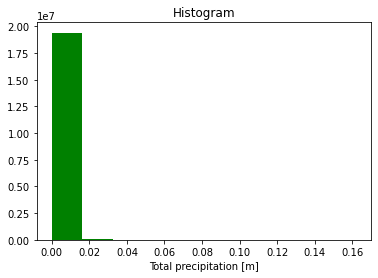

In [ ]:
ppt.tp.plot(color ='g')

In [ ]:
ppt_interp

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 4500, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-03T12:00:00
  * longitude  (longitude) float64 0.0 0.08 0.16 0.24 ... 359.8 359.8 359.9
  * latitude   (latitude) float64 90.0 89.92 89.84 89.76 ... -89.84 -89.92 -90.0
Data variables:
    tp         (time, latitude, longitude) float64 nan nan nan ... 3.473e-05 nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-05 05:06:26 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# Removing NaN values from ppt_interp_data to analyse
ppt_interp_data1 = ppt_interp_data.dropna()
ppt_interp_data1

tp
latitude longitude time                         
 83.44   323.44    2019-12-01 12:00:00  0.000003
                   2019-12-02 12:00:00  0.000003
                   2019-12-03 12:00:00  0.000009
         323.52    2019-12-01 12:00:00  0.000003
                   2019-12-02 12:00:00  0.000003
...                                          ...
-90.00   359.76    2019-12-02 12:00:00  0.000089
                   2019-12-03 12:00:00  0.000035
         359.84    2019-12-01 12:00:00  0.000040
                   2019-12-02 12:00:00  0.000089
                   2019-12-03 12:00:00  0.000035

[10170495 rows x 1 columns]

In [ ]:
# Accessing the 'tp' variable from ppt_interp dataset and saving it to t_p
t_p = ppt_interp_data1.tp


###### Making a boxplot to see the skewness

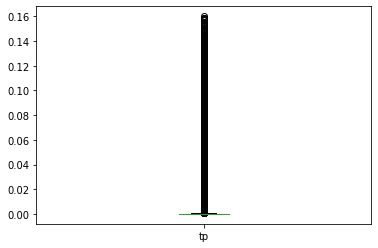

In [ ]:
t_p.to_frame().plot(kind = 'box')

In [ ]:
skew(t_p.to_frame())

array([10.22200939])

We can use the box plot to figure out that the total precipitation dataset is quite positively skewed.

###### Applying log transform to reduce skewness

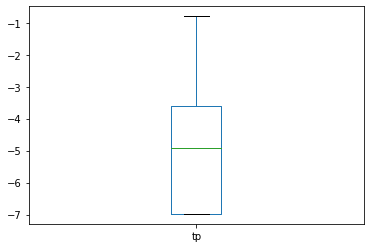

In [ ]:
x = np.log10(t_p)
x.to_frame().plot(kind = 'box')

In [ ]:
skew(x.to_frame().values)

array([0.10664877])

As we can see from the box plot applying log transform reduces skewness .

###### Square root transform

In [ ]:
#  calculating the square root 
sqrt_t_p = np.sqrt(t_p)


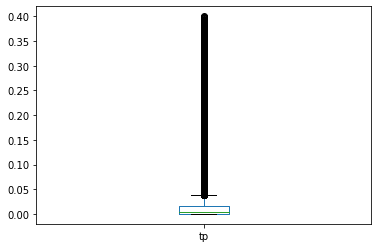

In [ ]:
sqrt_t_p.to_frame().plot(kind = 'box')

In [ ]:
skew(sqrt_t_p.to_frame())

array([3.15070388])

###### Cube root transform

In [ ]:
#calculating the cube root for the column data
cube_root_t_p = np.cbrt(t_p)


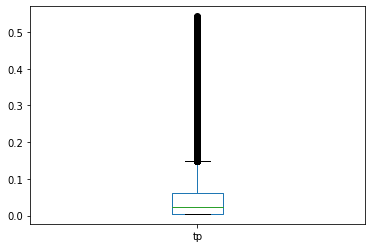

In [ ]:
cube_root_t_p.to_frame().plot(kind = 'box')

In [ ]:
skew(cube_root_t_p.to_frame())

array([1.92002082])

###### Box-Cox transform

In [ ]:
# transform training data & save lambda value
fitted_data,fitted_lambda = stats.boxcox(ppt_interp_data1.values.flatten())

In [ ]:
fitted_data

array([-14.70815946, -14.70815946, -13.17490049, ..., -11.25385979,
       -10.26738506, -11.41769291])

In [ ]:
fitted_lambda

-0.020323798612014284

In [ ]:
fitted_data.shape

(10170495,)

In [ ]:
fitted_data = fitted_data.reshape(10170495, 1)

In [ ]:
skew(fitted_data)

array([0.0370904])

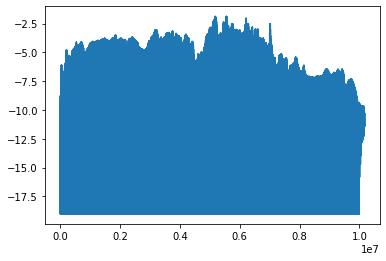

In [ ]:
plt.plot(fitted_data)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8bc0b54ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8bc0b655f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8bc0aee0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8bc0b65cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8bc0b54eb8>,
  <matplotlib.lines.Line2D at 0x7f8bc0b65278>]}

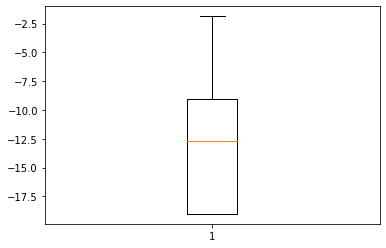

In [ ]:
plt.boxplot(fitted_data)

We find that applying Box-Cox transform reduces the skewness to a great extent as compared to log ,cube root and square root transform.

# Deep Learning for Geospatial Data

In [ ]:
# Converting to celsius scale
temp_interp_scale =(temp_interp.t2m-273.15)


In [ ]:
# Merging temp and soil data for training
train =xr.merge([temp_interp_scale,soil_interp,ppt_interp], compat="no_conflicts")
train_data = train.to_dataframe()
train_data

t2m     swvl1        tp
latitude longitude time                                              
 90.0    0.00      2019-12-01 12:00:00        NaN       NaN       NaN
                   2019-12-02 12:00:00        NaN       NaN       NaN
                   2019-12-03 12:00:00        NaN       NaN       NaN
         0.08      2019-12-01 12:00:00        NaN       NaN       NaN
                   2019-12-02 12:00:00        NaN       NaN       NaN
...                                           ...       ...       ...
-90.0    359.84    2019-12-02 12:00:00 -30.805914  0.206098  0.000089
                   2019-12-03 12:00:00 -31.161459  0.206098  0.000035
         359.92    2019-12-01 12:00:00        NaN       NaN       NaN
                   2019-12-02 12:00:00        NaN       NaN       NaN
                   2019-12-03 12:00:00        NaN       NaN       NaN

[30388500 rows x 3 columns]

In [ ]:
train_data.isnull().sum()

t2m      20218005
swvl1    20218005
tp       20218005
dtype: int64

In [ ]:
train_new = train_data.dropna()
train_new

2021-01-08 13:26:44,690 INFO NumExpr defaulting to 2 threads.


t2m     swvl1        tp
latitude longitude time                                              
 83.44   323.44    2019-12-01 12:00:00 -23.130290  0.244862  0.000003
                   2019-12-02 12:00:00 -19.354590  0.244862  0.000003
                   2019-12-03 12:00:00 -19.499376  0.244862  0.000009
         323.52    2019-12-01 12:00:00 -23.212092  0.244722  0.000003
                   2019-12-02 12:00:00 -19.301345  0.244722  0.000003
...                                           ...       ...       ...
-90.00   359.76    2019-12-02 12:00:00 -30.805914  0.206098  0.000089
                   2019-12-03 12:00:00 -31.161459  0.206098  0.000035
         359.84    2019-12-01 12:00:00 -31.465216  0.206098  0.000040
                   2019-12-02 12:00:00 -30.805914  0.206098  0.000089
                   2019-12-03 12:00:00 -31.161459  0.206098  0.000035

[10170495 rows x 3 columns]

In [ ]:
train_new.values.shape

(10170495, 3)

In [ ]:
label = train_new['tp']
train_new = train_new.drop(['tp'],axis=1)

In [ ]:
train_new

t2m     swvl1
latitude longitude time                                    
 83.44   323.44    2019-12-01 12:00:00 -23.130290  0.244862
                   2019-12-02 12:00:00 -19.354590  0.244862
                   2019-12-03 12:00:00 -19.499376  0.244862
         323.52    2019-12-01 12:00:00 -23.212092  0.244722
                   2019-12-02 12:00:00 -19.301345  0.244722
...                                           ...       ...
-90.00   359.76    2019-12-02 12:00:00 -30.805914  0.206098
                   2019-12-03 12:00:00 -31.161459  0.206098
         359.84    2019-12-01 12:00:00 -31.465216  0.206098
                   2019-12-02 12:00:00 -30.805914  0.206098
                   2019-12-03 12:00:00 -31.161459  0.206098

[10170495 rows x 2 columns]

In [ ]:
label = label.to_frame()
label

tp
latitude longitude time                         
 83.44   323.44    2019-12-01 12:00:00  0.000003
                   2019-12-02 12:00:00  0.000003
                   2019-12-03 12:00:00  0.000009
         323.52    2019-12-01 12:00:00  0.000003
                   2019-12-02 12:00:00  0.000003
...                                          ...
-90.00   359.76    2019-12-02 12:00:00  0.000089
                   2019-12-03 12:00:00  0.000035
         359.84    2019-12-01 12:00:00  0.000040
                   2019-12-02 12:00:00  0.000089
                   2019-12-03 12:00:00  0.000035

[10170495 rows x 1 columns]

###### Scaling the data

I have scaled the data using RobustScaler. Robust scaling removes the median and scales the dataset in the interquartile range (which is between 1st  quartile i.e 25th quantile and 3rd quartile i.e 75th quantile range).

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler() 
robust_df = scaler.fit_transform(train_new) 


In [ ]:
robust_df.shape

(10170495, 2)

In [ ]:
# Converting robust_df and ppt_interp_data to independent and dependent variables.
y = label.values
x = robust_df

In [ ]:
x.shape, y.shape

((10170495, 2), (10170495, 1))

In [ ]:
x.shape[1], y.shape[1]

(2, 1)

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=101) 


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9153445, 2), (1017050, 2), (9153445, 1), (1017050, 1))

In [ ]:
# Importing required modules for building the model
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.__version__, torchvision.__version__

('1.7.0+cu101', '0.8.1+cu101')

In [ ]:
# Creating Tensors 
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.FloatTensor(y_train)
Y_test=torch.FloatTensor(y_test)

##### Steps before model building




*   The data is upscaled to increase the spatial resolution. 
*   After upscaling, the number of data points are increased to around 30 million with an increase in NaN values.

*   The NaN values were deleted decreasing the number of rows to 10 million (which still is a huge dataset).
*   Many transforms (log, box-cox, square root, cube root) were used to evaluate the skewness.

*   The data was scaled by using 'RobustScaler'. Scaling the input values is very much required when using neural networks as variables with  large spread of values will lead to large error gradient values causing weight values to change drastically and there will be unstability in learning process of the model.
*   The data was split and converted to tensor giving input to model.













##### Model

*   I built a linear regression model to predict the 'Total Precipitation' from 'Temperature of air at 2m above the surface'and 'Volumetric soil water layer 1'. I also tried another regression model with 5 layers but colab ran out of memory. So, I proceeded with Linear regression.


*   The activation function is a linear function.

*   The loss function used is nn.MSELoss() which is the mean squared error. MSE is the average of the square of the difference between original values and predicted values. The error metric is mse.
*    SGD (stochastic gradient descent) is used as  optimiser.





##### Building Model


In [ ]:
# Creating the class
class LinearRegression(nn.Module):
  # super function
  # it inherits from nn.Module
  # and we can accces everything in nn.Module
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  # linear function
  def forward(self, x):
    return self.linear(x)
input_dim,output_dim =x.shape[1],y.shape[1]
model = LinearRegression(input_dim, output_dim) 
#calculating the mean squared error loss
mse = nn.MSELoss()
# optimization
learning_rate = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 

In [ ]:
model.parameters

<bound method Module.parameters of LinearRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)>

##### Training Model

In [ ]:
# train model
loss_list, test_losses = [],[]
iteration = 250
for i in range(250):
  # optimization step
  optimizer.zero_grad()
  # forward pass
  result = model(X_train)
  # calculate loss

  loss = mse(result, Y_train)
  # backward propagation
  loss.backward()
  # updating parameters
  optimizer.step()
  loss_list.append(loss.data)
  
  if (i%10 == 0):
    print("epoch: {} ==> loss: {}\n".format(i,loss.data))

  with torch.no_grad():
    pred = model(X_test)
    test_loss = mse(pred, Y_test)
    test_losses.append(test_loss.data)
    if (i%10 == 0):
      print("epoch: {} ==> Val_loss: {}\n".format(i,test_loss.data))



epoch: 0 ==> loss: 0.2617155611515045

epoch: 0 ==> Val_loss: 0.2431366741657257

epoch: 10 ==> loss: 0.13464725017547607

epoch: 10 ==> Val_loss: 0.12711183726787567

epoch: 20 ==> loss: 0.08007969707250595

epoch: 20 ==> Val_loss: 0.07645051926374435

epoch: 30 ==> loss: 0.052412085235118866

epoch: 30 ==> Val_loss: 0.05036428943276405

epoch: 40 ==> loss: 0.036246079951524734

epoch: 40 ==> Val_loss: 0.03495440259575844

epoch: 50 ==> loss: 0.02579660154879093

epoch: 50 ==> Val_loss: 0.024917427450418472

epoch: 60 ==> loss: 0.01863126829266548

epoch: 60 ==> Val_loss: 0.018012695014476776

epoch: 70 ==> loss: 0.013561963103711605

epoch: 70 ==> Val_loss: 0.013117614202201366

epoch: 80 ==> loss: 0.009925739839673042

epoch: 80 ==> Val_loss: 0.00960372481495142

epoch: 90 ==> loss: 0.00728030689060688

epoch: 90 ==> Val_loss: 0.007044204045087099

epoch: 100 ==> loss: 0.005345007870346308

epoch: 100 ==> Val_loss: 0.005172230768948793

epoch: 110 ==> loss: 0.003928708843886852

epo

##### Model performance

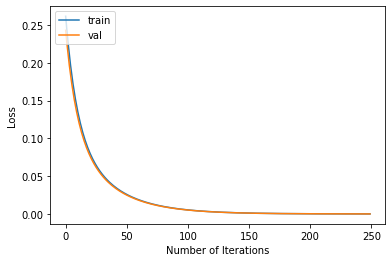

In [ ]:
# Visualizing model performance by plotting.
plt.plot(range(iteration), loss_list)
plt.plot(range(iteration), test_losses)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

For visualising model training and performance, we can simply plot the training and test losses and we can also observe the losses (as I have printed it for every 10th epoch). As we can see, our model did not overfit (training loss approximately equal to test/validation loss).

Our data is tabular data. In case of overfitting, one can use a smaller model. A small model (model with less layers and neurons) is less likely to overfit. Weight Constraint can be used in which we can constrain the magnitude of weights to be within a range.

I think less computational power might restrict the model from achieving a high accuracy.